In [92]:
#Dependencies

import numpy as np
import pandas as pd
from tensorflow import keras
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
df = pd.read_csv("fake_train.csv")
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [94]:
df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [96]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [97]:
df = df.dropna()

###**Checking for Imbalance Classes**

<AxesSubplot:xlabel='label', ylabel='count'>

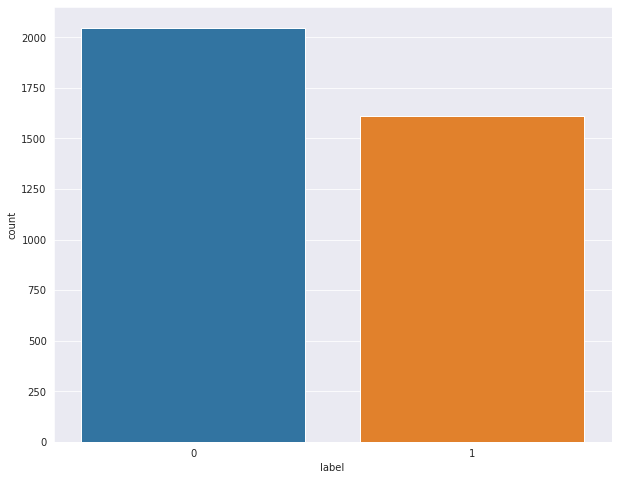

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.countplot(x='label',data=df)

In [100]:
X = df.drop(["id"],axis = 1)
y = df["label"]

In [101]:
X.shape,y.shape

((18285, 4), (18285,))

###**Apply Word Embedding Techniques**

###One hot representation

In [102]:
vocab_size = 5000

In [103]:
df["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [104]:
message=X.copy()

In [105]:
message["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [106]:
message.reset_index(inplace=True)

In [107]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [108]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(message)):
    review=re.sub("[^a-zA-Z]"," ",message["title"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

In [110]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [111]:
encoded_data = [one_hot(i,vocab_size) for i in corpus]
(encoded_data[0])

[498, 1600, 3171, 4626, 3252, 3977, 3873, 4387, 1740, 2243]

In [112]:
max_len = 30
padded_data = sequence.pad_sequences(encoded_data,maxlen=max_len,padding = "pre")


In [113]:
padded_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  498, 1600,
       3171, 4626, 3252, 3977, 3873, 4387, 1740, 2243], dtype=int32)

In [114]:
#Create the model and adding the layers
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length = max_len))
model.add(Dropout(0.3))
model.add(LSTM(70))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))


In [115]:
#Compile the model
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [116]:
#Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 30)            150000    
                                                                 
 dropout_2 (Dropout)         (None, 30, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 70)                28280     
                                                                 
 dropout_3 (Dropout)         (None, 70)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 71        
                                                                 
Total params: 178,351
Trainable params: 178,351
Non-trainable params: 0
_________________________________________________________________


In [117]:
X_final = np.array(padded_data)
y_final = np.array(y)

In [118]:
X_final

array([[   0,    0,    0, ..., 4387, 1740, 2243],
       [   0,    0,    0, ...,   94, 2644, 1791],
       [   0,    0,    0, ..., 4916,  363, 1899],
       ...,
       [   0,    0,    0, ..., 2887, 3381,   36],
       [   0,    0,    0, ..., 2990, 3568,  950],
       [   0,    0,    0, ...,   87, 4861, 4930]], dtype=int32)

In [119]:
y_final

array([1, 0, 1, ..., 0, 1, 1])

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((14628, 30), (3657, 30))

In [121]:
#Train the model

history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
229/229 [==============================] - 13s 40ms/step - loss: 0.3379 - accuracy: 0.8428 - val_loss: 0.2068 - val_accuracy: 0.9098
Epoch 2/10
229/229 [==============================] - 10s 43ms/step - loss: 0.1514 - accuracy: 0.9387 - val_loss: 0.2010 - val_accuracy: 0.9111
Epoch 3/10
229/229 [==============================] - 11s 47ms/step - loss: 0.1193 - accuracy: 0.9552 - val_loss: 0.2286 - val_accuracy: 0.9147
Epoch 4/10
229/229 [==============================] - 11s 47ms/step - loss: 0.0969 - accuracy: 0.9642 - val_loss: 0.2282 - val_accuracy: 0.9136
Epoch 5/10
229/229 [==============================] - 9s 39ms/step - loss: 0.0771 - accuracy: 0.9732 - val_loss: 0.2320 - val_accuracy: 0.9068
Epoch 6/10
229/229 [==============================] - 10s 44ms/step - loss: 0.0634 - accuracy: 0.9779 - val_loss: 0.2591 - val_accuracy: 0.9125
Epoch 7/10
229/229 [==============================] - 11s 48ms/step - loss: 0.0521 - accuracy: 0.9825 - val_loss: 0.2926 - val_accuracy: 

In [122]:
model.evaluate(X_test,y_test)

115/115 [==============================] - 1s 8ms/step - loss: 0.3877 - accuracy: 0.9095


[0.3877212107181549, 0.9094886779785156]

In [123]:
y_final

array([1, 0, 1, ..., 0, 1, 1])

In [124]:
y_pred = (model.predict(X_test)> (0.5)).astype(int)

115/115 [==============================] - 1s 9ms/step


In [126]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.9094886519004649

In [127]:
confusion_matrix(y_test,y_pred)

array([[1873,  209],
       [ 122, 1453]])

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2082
           1       0.87      0.92      0.90      1575

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657



###Single Prediction

In [142]:
def predict(word):
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', word)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    print(corpus)
    encoded_data = [one_hot(i,vocab_size) for i in corpus]
    print(encoded_data )
    padded_data = sequence.pad_sequences(encoded_data,maxlen=30,padding='pre')
    print(padded_data)
    return (model.predict(padded_data) > 0.5).astype("int32")

In [143]:
input = message.title[2]
predict(input)

['truth might get fire']
[[3812, 4916, 363, 1899]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 3812 4916
   363 1899]]
1/1 [==============================] - 0s 26ms/step


array([[1]], dtype=int32)